## SOM data analysis of Rn data

This notebook will show you how to do a recall with an SOM weight-cube and assign labels to the data based on this recall. This recall will assign a different number based on each cluster found, they will be under the data_type 'SOM_type'.

Most of the needed functions will be on a separate .py file, feel free to look at them if you are curious about what the functions are doing.

Side note: we might want to look at what some of these subclusters are, I will set here an example wtih the brown subclusters since I found it odd and decided to look at it, it seems to be a cluster of merged peaks at the peaklet level!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import viff # you might need to pip install viffIO
from PIL import Image
import straxen

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

In [2]:
from SOM_functions import *
from Peaklet_cls_functions import *

In [3]:
# This you can re
rn_peaklet_data = np.load('./saved_data/rn_peaklets_sr1_processed.npz')['arr_0']

In [4]:
norm_factors_array = np.load('./saved_data/rn_peaklets_sr1_bounds_2.npz', allow_pickle = True)['arr_0']
#norm_factors_array = np.concatenate((norm_factor[0], norm_factor[1].reshape(1))) # refomats data

In [5]:
WGTCUB = import_khoros_weightcube('./NS_outputs/E7.2_40x40_py_recall.k3.r.30000000.wgtcub')

In [6]:
# SCALED_WEIGHTCUBE = affine_transform(WGTCUB, -1, 1, 0, 1)

In [7]:
IMG = Image.open('./NS_outputs/im_SR1_E7.2_40x40_py.0.rmpsom.png') # Reference image of the class assigned to each neuron
IMG_RGB = IMG.convert('RGB')
NP_IMG = np.array(IMG_RGB) # make image a numpy array to handle easier later

In [8]:
SOM_CLS_IMG = select_middle_pixel(NP_IMG)

In [9]:
color_check, som_cls_check = assign_labels(rn_peaklet_data, 
                                           './NS_outputs/im_SR1_E7.2_40x40_py.0.rmpmap.png', 
                                           629, 629, 781)

[2. 5. 7. ... 8. 9. 8.]
394860
<class 'numpy.ndarray'>


In [10]:
norm_factors_array

array([ 5.31792365,  5.05087426,  4.95245704,  4.91039854,  4.88289674,
        4.88765308,  4.92851839,  4.96978731,  5.05875032,  5.33543707,
        6.48966408, 15.        ])

### Insert your own (peaklet level) data here!

In [11]:
# you can put your own data here for recall!
peaklet_data = rn_peaklet_data

#### The following plot will serve as a sanity check for later to make sure the recall worked

(10, 100000)

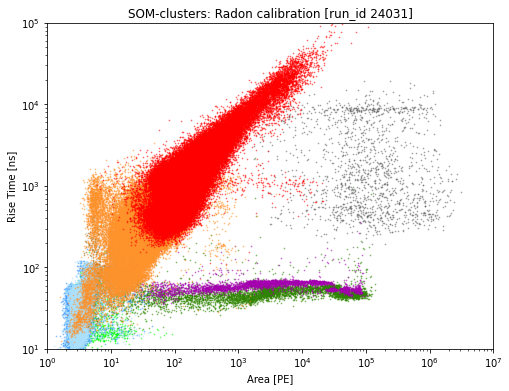

In [12]:

fig = plt.figure(figsize=(8,6))
for kind in np.arange(len(np.unique(som_cls_check['type']))):
    plt.scatter(som_cls_check['area'][som_cls_check['type'] == kind], 
                -som_cls_check['area_decile_from_midpoint'][:,1][som_cls_check['type'] == kind], 
                s=0.5, alpha = 0.5, color = color_check[kind]/255)
#plt.scatter(kr_pb_array['area'][kr_pb_array['type'] == 1], kr_pb_array['rise_time'][kr_pb_array['type'] == 1], s=0.1, color = 'blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Area [PE]')
plt.ylabel('Rise Time [ns]')
plt.title('SOM-clusters: Radon calibration [run_id 24031]')
plt.xlim(1,10000000)
plt.ylim(10,100000)

In [13]:
decile_transform_check = data_to_log_decile_log_area_aft(rn_peaklet_data, norm_factors_array)

(394860, 10)
(394860, 10)


In [14]:
norm_factors_array

array([ 5.31792365,  5.05087426,  4.95245704,  4.91039854,  4.88289674,
        4.88765308,  4.92851839,  4.96978731,  5.05875032,  5.33543707,
        6.48966408, 15.        ])

#### Another sanity check to make sure the dnesity distribution is resonable for the dataset I was using

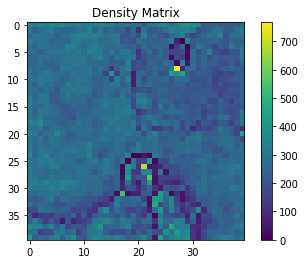

In [15]:
U_MAT = calculate_u_matrix(WGTCUB)
DENS_MAT = calculate_density_matrix(WGTCUB, U_MAT, decile_transform_check)
display_density_matrix(DENS_MAT)

In [16]:
data_w_SOM_labels = recall_populations(WGTCUB,
                                       SOM_CLS_IMG,
                                       peaklet_data,
                                       norm_factors_array,
                                       color_check)

(394860, 10)
(394860, 10)


(10, 100000)

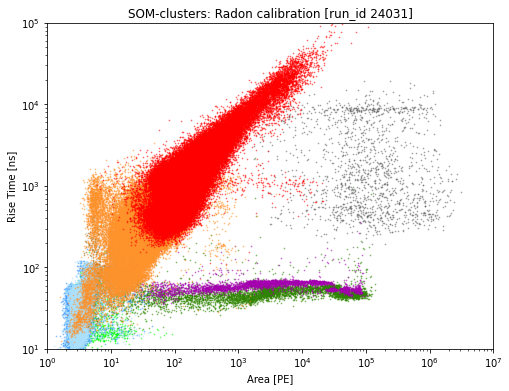

In [17]:
fig = plt.figure(figsize=(8,6))
for kind in np.arange(len(np.unique(som_cls_check['type']))):
    plt.scatter(data_w_SOM_labels['area'][data_w_SOM_labels['SOM_type'] == kind], 
                -data_w_SOM_labels['area_decile_from_midpoint'][:,1][data_w_SOM_labels['SOM_type'] == kind], 
                s=0.5, alpha = 0.5, color = color_check[kind]/255)
#plt.scatter(kr_pb_array['area'][kr_pb_array['type'] == 1], kr_pb_array['rise_time'][kr_pb_array['type'] == 1], s=0.1, color = 'blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Area [PE]')
plt.ylabel('Rise Time [ns]')
plt.title('SOM-clusters: Radon calibration [run_id 24031]')
plt.xlim(1,10000000)
plt.ylim(10,100000)

#### Great! what we got straight out of the SOM with the data reference image matches what we see with the recall function. So things are working like we expected!

Here I will biefly show a particular cluster that I think might be of interest to us, but I think some time might be well spent trying to figure out what each cluster is. 

Although if we want to use all this for peak classification of all data types it might be a good idea to give the SOM access to all data it will see, making it more robust. I am thinking of training an SOM with maybe 100k event for each calibration source. Detangling that and then using that result for peaklet classification. I will probably start working on the straxen pluggin while we decide on what data would be best to use.

(10, 10000)

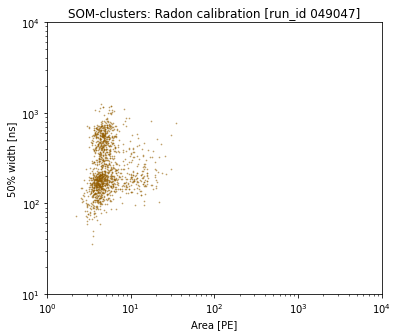

In [18]:
fig = plt.figure(figsize=(6,5))

plt.scatter(data_w_SOM_labels['area'][data_w_SOM_labels['SOM_type'] == 5], 
            data_w_SOM_labels['width'][:,5][data_w_SOM_labels['SOM_type'] == 5], 
            s=0.5, alpha = 0.5, color = color_check[5]/255)
#plt.scatter(kr_pb_array['area'][kr_pb_array['type'] == 1], kr_pb_array['rise_time'][kr_pb_array['type'] == 1], s=0.1, color = 'blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Area [PE]')
plt.ylabel('50% width [ns]')
plt.title('SOM-clusters: Radon calibration [run_id 049047]')
plt.xlim(1,10000)
plt.ylim(10,10000)

(10, 10000)

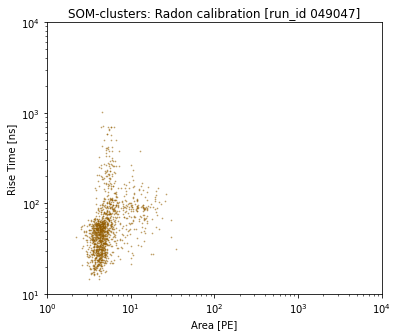

In [19]:
fig = plt.figure(figsize=(6,5))

plt.scatter(data_w_SOM_labels['area'][data_w_SOM_labels['SOM_type'] == 5], 
            -data_w_SOM_labels['area_decile_from_midpoint'][:,1][data_w_SOM_labels['SOM_type'] == 5], 
            s=0.5, alpha = 0.5, color = color_check[5]/255)
#plt.scatter(kr_pb_array['area'][kr_pb_array['type'] == 1], kr_pb_array['rise_time'][kr_pb_array['type'] == 1], s=0.1, color = 'blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Area [PE]')
plt.ylabel('Rise Time [ns]')
plt.title('SOM-clusters: Radon calibration [run_id 049047]')
plt.xlim(1,10000)
plt.ylim(10,10000)

In [20]:
brown_cluster = data_w_SOM_labels[data_w_SOM_labels['SOM_type'] == 5]

In [21]:
area_linspace =  np.linspace(1, 100, 200)

(0.0, 300.0)

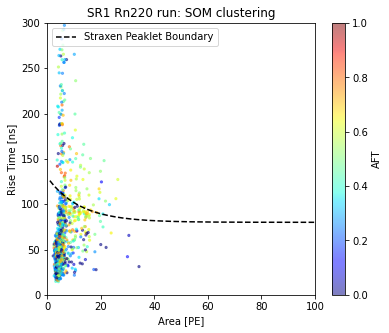

In [22]:
fig = plt.figure(figsize=(6,5))
vmin = 0
vmax = 1
parm2 = np.array([50, 12, 80])
plt.scatter(brown_cluster['area'], 
            -brown_cluster['area_decile_from_midpoint'][:,1], 
            c = compute_AFT(brown_cluster), vmin = vmin, vmax = vmax,
            cmap = cm.get_cmap('jet'),
            s=5, alpha = 0.5)

plt.plot(area_linspace, compute_s1_boundary(parm2, area_linspace),
         '--' ,color = 'black', label = 'Straxen Peaklet Boundary')
#plt.scatter(kr_pb_array['area'][kr_pb_array['type'] == 1], kr_pb_array['rise_time'][kr_pb_array['type'] == 1], s=0.1, color = 'blue')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Area [PE]')
plt.ylabel('Rise Time [ns]')
plt.legend(markerscale=8, loc = 2)
plt.title("SR1 Rn220 run: SOM clustering")
plt.colorbar(label = 'AFT')
plt.xlim(0,100)
plt.ylim(0,300)

The AFT does not seem particularly concerning, I would say these seem like typical S1's for the most part except a substantial number of events seem to be above the S1/S2 boundary line

Now lets look at some wavefroms!

Text(0, 0.5, 'Amplitude [PE / 10[ns]]')

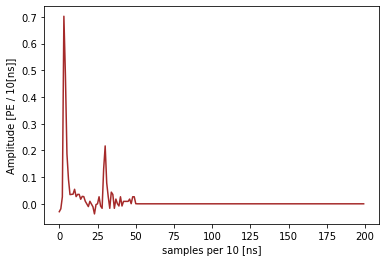

In [23]:
plt.plot(brown_cluster['data'][0], color = 'brown')
plt.xlabel('samples per 10 [ns]')
plt.ylabel('Amplitude [PE / 10[ns]]')

Text(0, 0.5, 'Amplitude [PE / 10[ns]]')

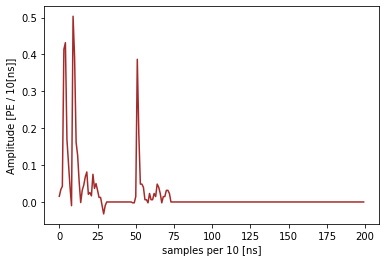

In [24]:
plt.plot(brown_cluster['data'][1], color = 'brown')
plt.xlabel('samples per 10 [ns]')
plt.ylabel('Amplitude [PE / 10[ns]]')

Text(0, 0.5, 'Amplitude [PE / 10[ns]]')

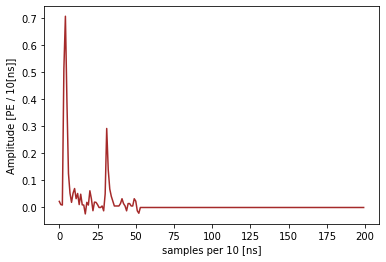

In [25]:
plt.plot(brown_cluster['data'][2], color = 'brown')
plt.xlabel('samples per 10 [ns]')
plt.ylabel('Amplitude [PE / 10[ns]]')

Text(0, 0.5, 'Amplitude [PE / 10[ns]]')

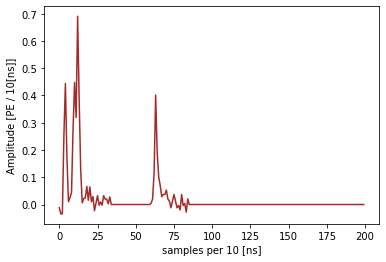

In [26]:
plt.plot(brown_cluster['data'][3], color = 'brown')
plt.xlabel('samples per 10 [ns]')
plt.ylabel('Amplitude [PE / 10[ns]]')

Text(0, 0.5, 'Amplitude [PE / 10[ns]]')

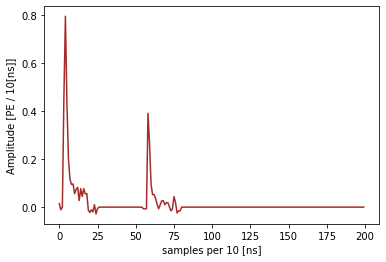

In [27]:
plt.plot(brown_cluster['data'][4], color = 'brown')
plt.xlabel('samples per 10 [ns]')
plt.ylabel('Amplitude [PE / 10[ns]]')

After looking over a few example of this dataset it looks like it mainly coinsists of merged peaks! Which is odd to find at the peaklet level